In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [2]:
db_path = 'data.db'
db = sqlite3.connect(db_path)

In [3]:
def calculate_overhead_and_sleep_time(task):
    if task['tag'] == 'noop':
        task['overhead'] = task['completion time']
        task['sleep_time'] = 0
    elif task['tag'] == 'sleep10ms':
        task['overhead'] = task['completion time'] - 0.01
        task['sleep_time'] = 0.01
    elif task['tag'] == 'sleep100ms':
        task['overhead'] = task['completion time'] - 0.1
        task['sleep_time'] = 0.1
    elif task['tag'] == 'sleep1000ms':
        task['overhead'] = task['completion time'] - 1
        task['sleep_time'] = 1
    return task

tasks = pd.read_sql_query('select * from tasks', db)
tasks['completion time'] = tasks['returned'] - tasks['start_submit']
tasks = tasks.apply(calculate_overhead_and_sleep_time, axis=1)

   sleep_time  overhead
0        0.00  0.205311
1        0.01  0.204079
2        0.10  0.204159
3        1.00  0.195449
   sleep_time  overhead
0        0.00  0.206135
1        0.01  0.204702
2        0.10  0.205879
3        1.00  0.186880
   sleep_time  overhead
0        0.00  0.206057
1        0.01  0.205190
2        0.10  0.205716
3        1.00  0.176451


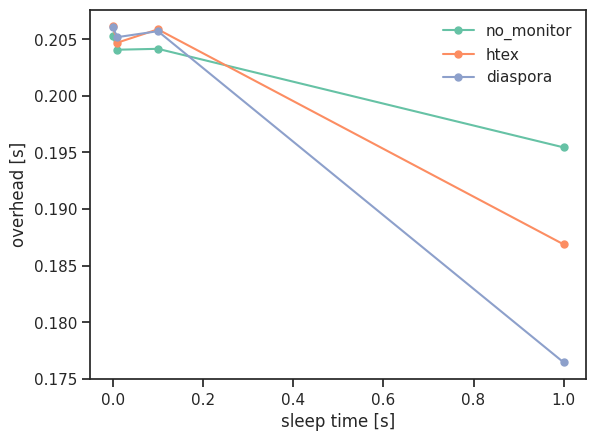

In [6]:
monitor_tags = ['no_monitor', 'htex', 'diaspora']

tasks_per_trial = 3

fig, ax = plt.subplots()
for monitor_tag in monitor_tags:
    df = tasks[(tasks['monitor_tag'] == monitor_tag)].groupby('sleep_time', as_index=False)['overhead']
    means = df.mean()
    print(means)
    # standard_deviations = df.std()
    means.plot('sleep_time', 'overhead', marker='o', ms=5,   label=monitor_tag, ax=ax) # yerr=errors['completion time'],

# plt.ylim(0.1)
plt.ylabel('overhead [s]'.format(tasks_per_trial))
plt.xlabel('sleep time [s]')
plt.legend(frameon=False)